## Element 1 Part 1 - Mobile Usage Effects
Aim: We want to study if users with high mobile usage find a given visual search target faster than their counterparts; and also to assess if there is any significant interactions with other Independent Variables.

### 1. Data Quality Check:

To ready our data for analysis, we will execute the following sequence of tasks:

- Import the data and transform it into a dataframe.
- Standardize the code to lowercase, eliminating spaces for string values and numeric characters for other data types.
- Convert the "Device" variable into a categorical value, a prerequisite for a subsequent task.
- Identify and substitute missing values with "np.nan."
- Scrutinize the potential causes of these gaps and discern patterns, classifying them as Missing Completely At Random (MCAR), Missing At Random (MAR), or Missing Not At Random (MNAR).
- Based on the classification of each missing variable, select appropriate methodologies for value imputation or opt to eliminate the values.
- Given our emphasis on exploratory analysis, we will defer the assessment of variable correlations initially. It's crucial to note that our exploratory findings may not possess immediate statistical significance.
- Saving Cleaned Dataset - Save the cleaned dataset to a new CSV file using to_csv().

**Sources:**

Analytics Vidhya. (2021, October 14). Handling Missing Values: What Is a Missing Value? https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/#What_Is_a_Missing_Value?

DataCamp. (n.d.). Techniques to Handle Missing Data Values. https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values

In [141]:
# Import libraries 
import pandas as pd 
import numpy as np

# Load thhe dataset
file_path = 'MASTER_PhonesmartdataAll_CCI_AdvStats.csv'
df = pd.read_csv(file_path) # reading the csv file into a DataFrame

# Converting non-string values into numeric values
df['VS_RT_correct_Single'] = pd.to_numeric(df['VS_RT_correct_Single'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['VS_RT_correct_Conjunction'] = pd.to_numeric(df['VS_RT_correct_Conjunction'], errors='coerce')
df['STAI'] = pd.to_numeric(df['STAI'], errors='coerce')
df['BRIEF_Total'] = pd.to_numeric(df['BRIEF_Total'], errors='coerce')
df['DailyAvgMins'] = pd.to_numeric(df['DailyAvgMins'], errors='coerce')
df['DailyAvePickups'] = pd.to_numeric(df['DailyAvePickups'], errors='coerce')
df['GenderNum'] = pd.to_numeric(df['GenderNum'], errors='coerce')

# Converting string values into lowercase, space free strings
df['Device'] = df['Device'].str.strip().str.lower().replace('iphone', 'iphone', regex=True)
df['Device'] = df['Device'].str.strip()

# Converting the variable "Device" into a categoric variable that starts at "1"
df['Device'] = df['Device'].astype('category')
df['Device'] = df['Device'].cat.codes + 1

# Changing column names - for better comprehension
new_column_names = ['Year','Age', 'Gender', 'AutismQuotient','STAI', 'BriefTotal', 'Device', 'DailyAvgMins','DailyAvgPickups', 'RTCorrectConjunction', 'RTCorrectSingle']
df.columns = new_column_names

# Writing the modified DataFrame back to a new CSV file
df.to_csv('Edited_MASTER_PhonesmartdataAll_CCI_AdvStats.csv', index=False)

# Display the initial shape of the dataset
print("Initial shape of the Dataset:", df.shape)

Initial shape of the Dataset: (548, 11)


In [142]:
# Exploration of the dataset & Dealing with the missing values:

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display information about the dataset, 
# including data types and missing values - 
    # it cannot recognise the missing values in the csv file
print("\nDataset info:")
print(df.info())

# Checking for unique values in the columns
print("\nUnique Values in the 'Gender' Column:")
print(df['Age'].unique())

print("\nUnique Values in the 'Year' Column:")
print(df['Year'].unique())

print("\nUnique Values in the 'BriefTotal' Column:")
print(df['BriefTotal'].unique()) 
# Looking at the columns one can clearly see there are missing values

missing_values = df.isnull().sum().sum()
print("Number of missing values in the DataFrame =", missing_values)

missing_values_column = df.isnull().sum()
print("Number of missing values in each column =", missing_values_column)

# the missing values were not being recognised as such, 
# but were being considered as unique values
# replacing the unique values with NaN, helped it to recoginise the missing values

# Replace the unique values representing missing values with NaN
df.replace(' ', pd.NA, inplace=True)


First few rows of the dataset:
   Year   Age  Gender AutismQuotient  STAI  BriefTotal  Device  DailyAvgMins  \
0  2022   NaN     2.0              4  49.0        70.0       1           NaN   
1  2021  37.0     2.0              8  44.0        33.0       1           NaN   
2  2022   NaN     1.0                  NaN         NaN       1           NaN   
3  2022   NaN     1.0                  NaN         NaN       1           NaN   
4  2022   NaN     2.0                  NaN         NaN       1           NaN   

   DailyAvgPickups  RTCorrectConjunction  RTCorrectSingle  
0              NaN           1178.700000      1216.387500  
1              NaN            946.470000       785.597500  
2              NaN           1182.741667       950.900000  
3              NaN           1778.950000       984.333333  
4              NaN            521.500000       503.000000  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 11 columns):
 #   Col

In [143]:
# Data Cleaning:

# One-hot encoding to categorical columns
categorical_columns = ['Device']
df_encoded = pd.get_dummies(df, columns = categorical_columns, drop_first=True)

#Display the encoded DataFrame
print("Encoded DataFrame:")
print(df_encoded.head())

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull()
print(missing_values) 

# Check for duplicate rows
duplicates = df.duplicated()
print("\nNumber of Duplicate Rows:", duplicates.sum())

# Deleting rows with missing values
df = df.dropna()

# Display the shape now
print("Revised shape of the Dataset:", df.shape)


Encoded DataFrame:
   Year   Age  Gender AutismQuotient  STAI  BriefTotal  DailyAvgMins  \
0  2022   NaN     2.0              4  49.0        70.0           NaN   
1  2021  37.0     2.0              8  44.0        33.0           NaN   
2  2022   NaN     1.0           <NA>   NaN         NaN           NaN   
3  2022   NaN     1.0           <NA>   NaN         NaN           NaN   
4  2022   NaN     2.0           <NA>   NaN         NaN           NaN   

   DailyAvgPickups  RTCorrectConjunction  RTCorrectSingle  Device_2  Device_3  \
0              NaN           1178.700000      1216.387500     False     False   
1              NaN            946.470000       785.597500     False     False   
2              NaN           1182.741667       950.900000     False     False   
3              NaN           1778.950000       984.333333     False     False   
4              NaN            521.500000       503.000000     False     False   

   Device_4  
0     False  
1     False  
2     False  
3    

### 2. Data Relationship/Distribution

In [144]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Gender
# Gender balance
gender_counts = df["Gender"].value_counts()
print(gender_counts)

#We can conclude that we have a gender imbalance and are mainly dealing with "gender 2"
# Assigning a 4th gender to the missing values
df['Gender'] = df['Gender'].fillna(4)

# Filtering the data by gender to calculate 
# means of DailyAvgMins and DailyAvgPickups for each gender
filtered_df1 = df[df["Gender"] == 1]
filtered_df2 = df[df["Gender"] == 2]
filtered_df3 = df[df["Gender"] == 3]
filtered_df4 = df[df["Gender"] == 4]

print("DailyAvgMins Means:"+str(filtered_df1["DailyAvgMins"].mean()) + ", " +
      str(filtered_df2["DailyAvgMins"].mean()) + ", " +
      str(filtered_df3["DailyAvgMins"].mean()) + ", " +
      str(filtered_df4["DailyAvgMins"].mean()))

print("DailyAvgPickups Means:"+str(filtered_df1["DailyAvgPickups"].mean()) + ", " +
      str(filtered_df2["DailyAvgPickups"].mean()) + ", " +
      str(filtered_df3["DailyAvgPickups"].mean()) + ", " +
      str(filtered_df4["DailyAvgPickups"].mean()))

Gender
2.0    101
1.0     21
3.0      2
Name: count, dtype: int64
DailyAvgMins Means:235.8095238095238, 272.35643564356434, 309.0, nan
DailyAvgPickups Means:100.19047619047619, 105.21782178217822, 131.0, nan


Age
27.0    13
30.0     9
20.0     8
31.0     7
21.0     7
32.0     6
34.0     6
24.0     6
22.0     6
23.0     5
28.0     5
26.0     5
33.0     5
35.0     4
36.0     4
19.0     4
39.0     3
29.0     3
25.0     3
44.0     2
42.0     2
41.0     2
45.0     1
51.0     1
46.0     1
43.0     1
40.0     1
47.0     1
49.0     1
37.0     1
62.0     1
Name: count, dtype: int64


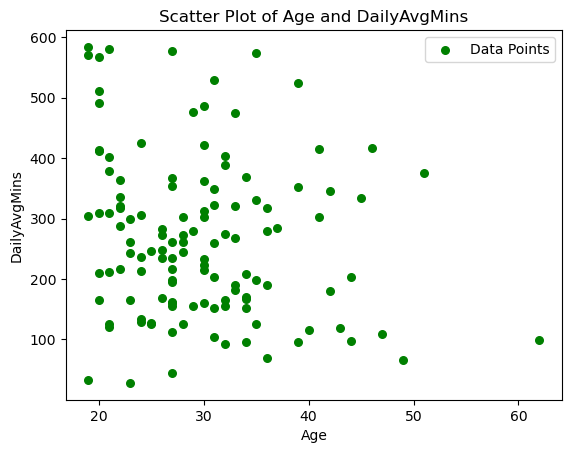

In [145]:
#Age
#Age balance
age_balance = df["Age"].value_counts()
print(age_balance)

#We can conclude that we are mainly dealing with young people who perhaps use their phones more than older people.

# Scatter plot 
import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['DailyAvgMins'], marker='o', color='green', s=30, label='Data Points')

plt.xlabel('Age')
plt.ylabel('DailyAvgMins')
plt.title('Scatter Plot of Age and DailyAvgMins')

plt.legend()

# Show the plot
plt.show()

# There doesn't seem to be a evident pattern in the distribution


Frequency Table - Pickup Counts by Gender:
DailyAvgPickups  32.0   34.0   37.0   40.0   46.0   48.0   49.0   50.0   \
Gender                                                                    
1.0                  0      0      0      0      0      0      0      1   
2.0                  1      1      1      1      1      1      1      0   
3.0                  0      0      0      0      0      0      0      0   

DailyAvgPickups  51.0   53.0   ...  163.0  164.0  176.0  177.0  178.0  194.0  \
Gender                         ...                                             
1.0                  0      0  ...      1      0      0      0      1      0   
2.0                  1      1  ...      0      1      1      1      0      1   
3.0                  0      0  ...      0      0      0      0      0      0   

DailyAvgPickups  204.0  218.0  228.0  272.0  
Gender                                       
1.0                  0      0      0      1  
2.0                  1      1      1     

/var/folders/53/f_mlkwxj7xd3c9929h9ychkw0000gq/T/ipykernel_3483/3048755096.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='DailyAvgPickups', data=df, palette='pastel')


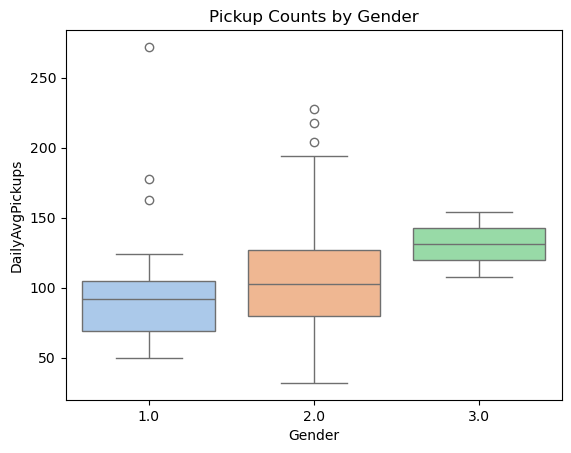

/var/folders/53/f_mlkwxj7xd3c9929h9ychkw0000gq/T/ipykernel_3483/3048755096.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='DailyAvgPickups', data=df, palette='pastel')


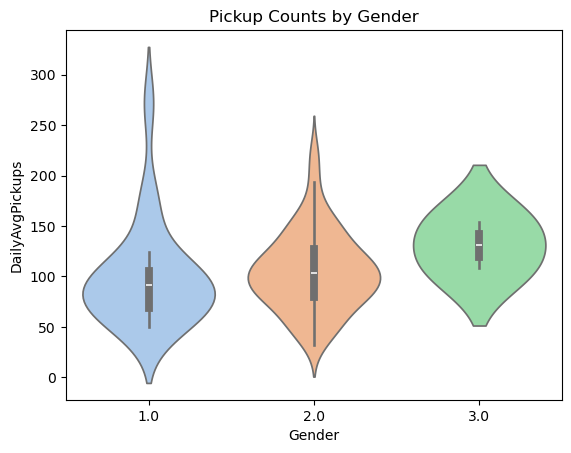

In [146]:
# a. Frequency table and plot for Pickup counts split by gender
gender_pickup_counts = df.groupby('Gender')['DailyAvgPickups'].value_counts().unstack(fill_value=0)
print("\nFrequency Table - Pickup Counts by Gender:")
print(gender_pickup_counts)

##Transpose the DataFrame to have 'Daily Average pickups' as columns
#gender_pickup_counts_transposed = gender_pickup_counts.T

# Plotting bar chart
# Box plot - compare means and variance for the DailyAvgPickups among genders
sns.boxplot(x='Gender', y='DailyAvgPickups', data=df, palette='pastel')
plt.title('Pickup Counts by Gender')
plt.show()

# Violin plot 
sns.violinplot(x='Gender', y='DailyAvgPickups', data=df, palette='pastel')
plt.title('Pickup Counts by Gender')
plt.show()

# We can infer that the DailyAvePickups for the 3rd gender exhibit a lower variability, 
# Genders 1 and 3 have means closer to their lower limit, 
# while gender 2 has mean positioned closer to the median.


In [147]:
# b. Frequency table and plots for Daily average minutes
frequency_table = df['DailyAvgMins'].value_counts().reset_index().rename(columns={'index': 'Minutes', 'DailyAvgMins': 'Frequency'})
print(frequency_table)

     Frequency  count
0        261.0      2
1        203.0      2
2        310.0      2
3         95.0      2
4        280.0      2
..         ...    ...
104      313.0      1
105      214.0      1
106      323.0      1
107      127.0      1
108       99.0      1

[109 rows x 2 columns]


"plt.figure(figsize=(12, 6))\nplt.subplot(1, 2, 1)\nsns.histplot(df['DailyAvgMins'], kde=True)\nplt.title('Histogram of Daily Average Minutes')\n\nplt.subplot(1, 2, 2)\nsns.boxplot(x='DailyAvgMins', data=df)\nplt.title('Boxplot of Daily Average Minutes')\n\nplt.show()"

<Figure size 1200x600 with 0 Axes>

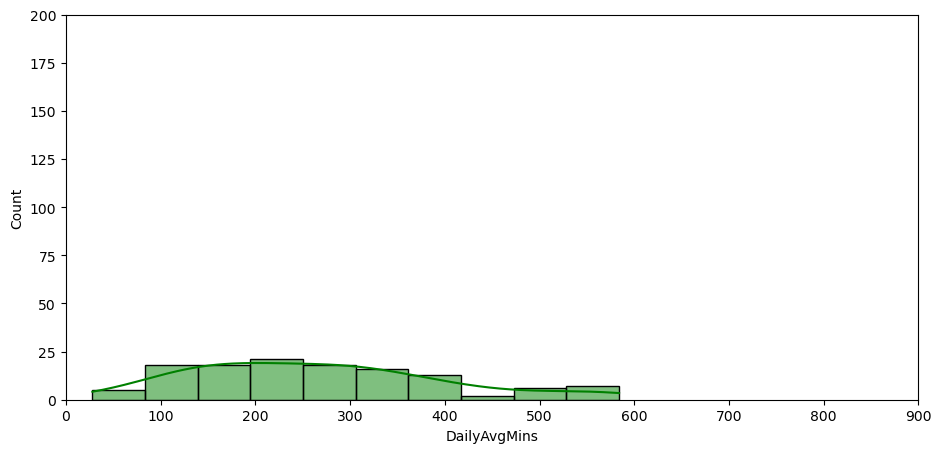

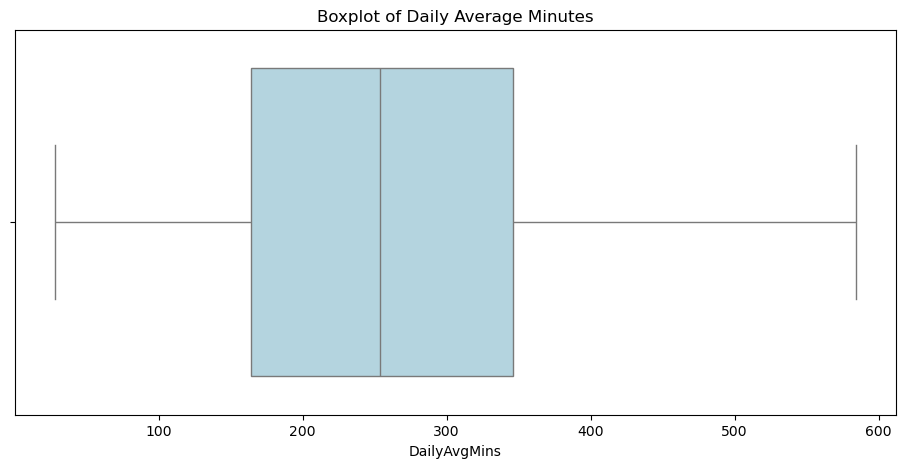

In [148]:
# Plotting histogram and boxplot - to visualise the distribution
plt.figure(figsize=(12, 6))

#Histogram
fig, ax = plt.subplots()
sns.histplot(df['DailyAvgMins'],bins=10, kde=True, color="green")  # distplot is deprecate and replaced by histplot
ax.set_xlim(0,900)
ax.set_ylim(0,200)
fig.set_size_inches(11,5)

# Boxplot
plt.figure(figsize=(25,5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['DailyAvgMins'], color='lightblue')
plt.title('Boxplot of Daily Average Minutes')

    # Daily average side crammed with the numbers

'''plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['DailyAvgMins'], kde=True)
plt.title('Histogram of Daily Average Minutes')

plt.subplot(1, 2, 2)
sns.boxplot(x='DailyAvgMins', data=df)
plt.title('Boxplot of Daily Average Minutes')

plt.show()'''

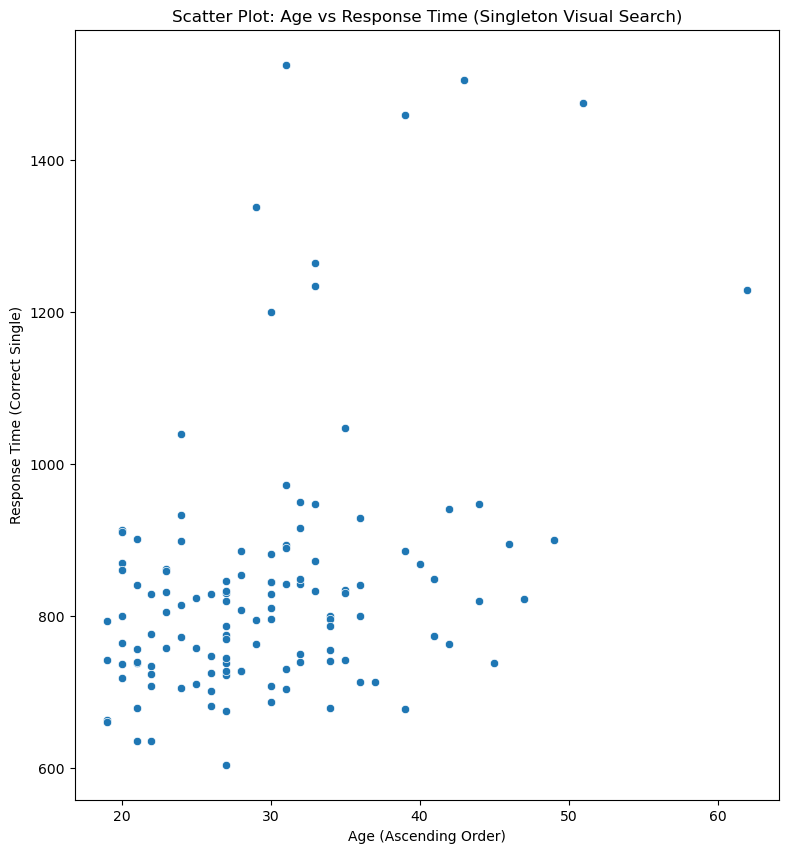

In [149]:
# c. Plots for relationship between age and response time
# i. Scatter plot for age and response time on singleton visual search

# Sort the DataFrame by the 'Age' column in ascending order  
df_sorted_age = df.sort_values(by='Age')

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='RTCorrectSingle', data=df_sorted_age)
plt.title('Scatter Plot: Age vs Response Time (Singleton Visual Search)')
plt.xlabel('Age (Ascending Order)')
    # age 101 coming in first
plt.ylabel('Response Time (Correct Single)')
plt.show()

/var/folders/53/f_mlkwxj7xd3c9929h9ychkw0000gq/T/ipykernel_3483/207775849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='RTCorrectConjunction', data=df, palette='husl')


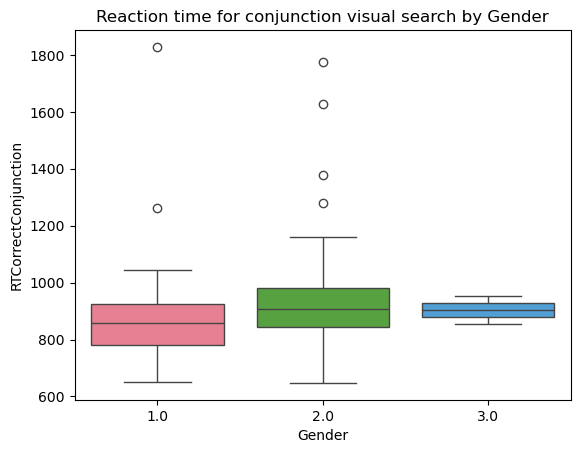

/var/folders/53/f_mlkwxj7xd3c9929h9ychkw0000gq/T/ipykernel_3483/207775849.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='RTCorrectConjunction', data=df, palette='husl')


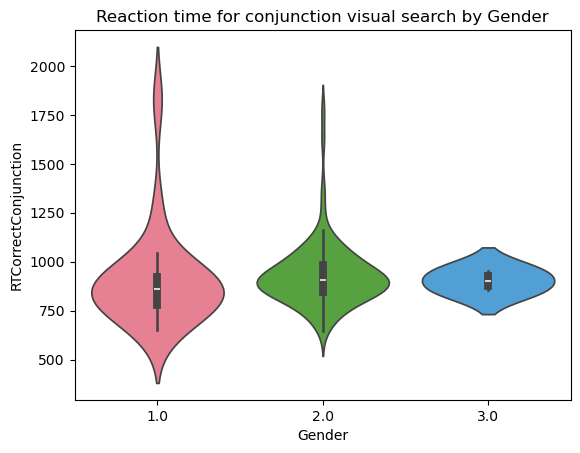

In [150]:
# ii. Boxplot for gender and response time on conjunction visual search

sns.boxplot(x='Gender', y='RTCorrectConjunction', data=df, palette='husl')
plt.title('Reaction time for conjunction visual search by Gender')
plt.show()

sns.violinplot(x='Gender', y='RTCorrectConjunction', data=df, palette='husl')
plt.title('Reaction time for conjunction visual search by Gender')
plt.show()



### Correlation Check: 
Produce a bivariate correlation table between Age, STAI, BRIEF_Total, DailyAvgMins and VS_RT_correct_Single.

This code calculates the pairwise correlation coefficients between the specified columns and creates a correlation table. The values in the table will range from -1 to 1, indicating the strength and direction of the linear relationship between the variables.

You can interpret the correlation values as follows:

- 1: Perfect positive correlation
- 0: No correlation
- -1: Perfect negative correlation

Additionally, you can visualize the correlation matrix using a heatmap for better understanding:

In [151]:
selected_columns = ['Age', 'STAI', 'BriefTotal', 'DailyAvgMins', 'RTCorrectSingle']

# Convert selected columns to numeric, coercing errors to NaN
df[selected_columns] = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df = df.dropna(subset=selected_columns)

# Compute correlation table
correlation_table = df[selected_columns].corr()

# Display the correlation table
print("Bivariate Correlation Table:")
print(correlation_table)

Bivariate Correlation Table:
                      Age      STAI  BriefTotal  DailyAvgMins  RTCorrectSingle
Age              1.000000 -0.159709   -0.147331     -0.181013         0.393644
STAI            -0.159709  1.000000    0.693311      0.058931        -0.239404
BriefTotal      -0.147331  0.693311    1.000000      0.103646        -0.175548
DailyAvgMins    -0.181013  0.058931    0.103646      1.000000        -0.097214
RTCorrectSingle  0.393644 -0.239404   -0.175548     -0.097214         1.000000


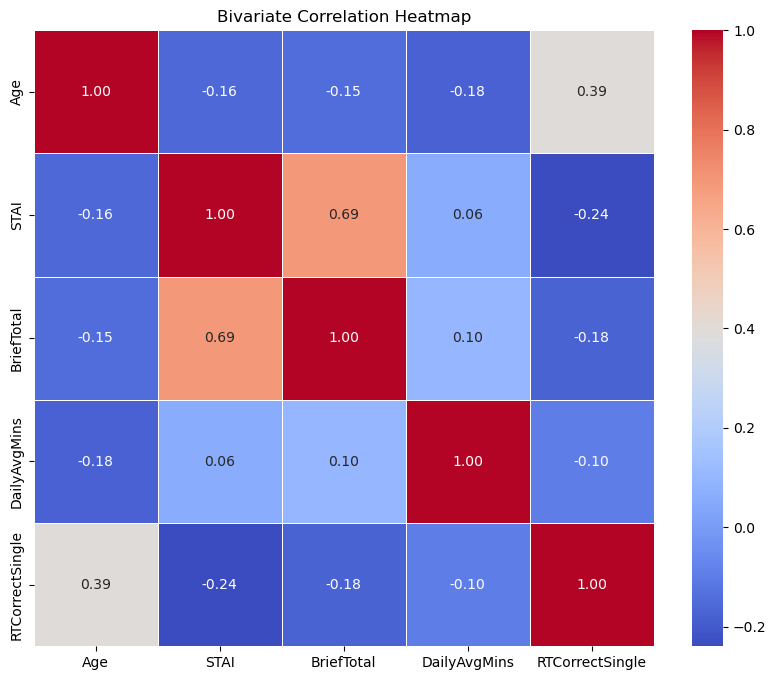

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Bivariate Correlation Heatmap")
plt.show()

The correlation matrix yields the following insights into the strength and direction of relationships between variables:

- With the exception of VS_RT_correct_Single, all variables exhibit a weak negative correlation with Age. This suggests that higher values in these variables are weakly associated with lower Age values, and vice versa.

- STAIC and BRIEF_Total demonstrate a strong positive correlation, indicating that higher values in STAIC are associated with higher values in BRIEF_Total, and vice versa.

- VS_RT_correct_Single shows a weak negative correlation with STAIC and DailyAvgMins, implying that higher values in VS_RT_correct_Single are weakly associated with lower values in both STAIC and DailyAvgMins.

- Correlations not explicitly detailed herein are weak positive correlations, indicating that a higher value in one variable is weakly associated with an increase in the other.

### Linear Regression:

In [153]:
import statsmodels.api as sm

data = {'DailyAvgMins': df['DailyAvgMins'],
        'RTCorrectSingle': df['RTCorrectSingle']}

df_regression = pd.DataFrame(data)

# Define the dependent and independent variables
X = sm.add_constant(df_regression['DailyAvgMins'])  # Add a constant term to the predictor
y = df_regression['RTCorrectSingle']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        RTCorrectSingle   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.164
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.283
Time:                        17:03:30   Log-Likelihood:                -812.25
No. Observations:                 124   AIC:                             1629.
Df Residuals:                     122   BIC:                             1634.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          872.4076     34.468     25.310   

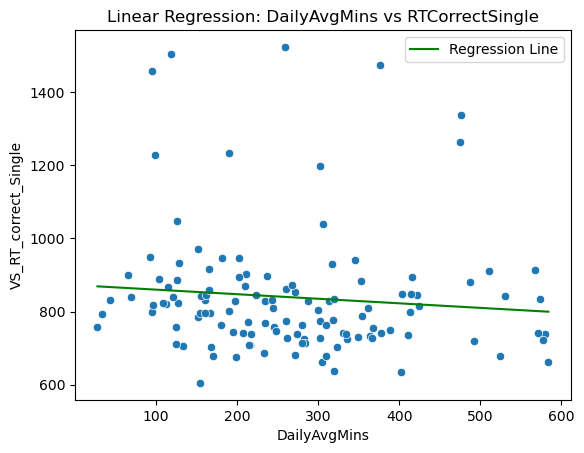

In [154]:
# Plot the regression line
sns.scatterplot(x='DailyAvgMins', y='RTCorrectSingle', data=df_regression)
sns.lineplot(x=X['DailyAvgMins'], y=model.predict(X), color='green', label='Regression Line')
plt.title('Linear Regression: DailyAvgMins vs RTCorrectSingle')
plt.xlabel('DailyAvgMins')
plt.ylabel('VS_RT_correct_Single')
plt.legend()
plt.show()

The R2 value is notably low, and the scatter plot appears as a collection of random points without adhering to the trend of the plotted line. This leads us to infer that there isn't a discernible linear relationship that can be employed for predicting RTCorrectSingle based on daily average minutes of usage.

### Multiple Regression

In [155]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [156]:
import statsmodels.api as sm

# Replace these column names with the actual column names in your dataset
X_columns = ['Age', 'Gender', 'STAI', 'BriefTotal', 'DailyAvgMins', 'DailyAvgPickups']
y_column = 'RTCorrectSingle'

# Select columns for X and y
X = df[X_columns]
y = df[y_column]

# Convert object columns to numeric
for col in X.select_dtypes(include='object').columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Check for missing values in X and y
if X.isnull().values.any() or y.isnull().values.any():
    # Impute missing values
    X.fillna(X.mean(), inplace=True)  # Replace NaN with the mean, adjust based on your data and context
    y.fillna(y.mean(), inplace=True)  # Replace NaN with the mean for the dependent variable

# Convert DataFrame to NumPy array
X = sm.add_constant(X.to_numpy())

# Fit the multiple regression model
model_with_all_predictors = sm.OLS(y, X).fit()

# Display the regression results
print(model_with_all_predictors.summary())


                            OLS Regression Results                            
Dep. Variable:        RTCorrectSingle   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     5.439
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           5.43e-05
Time:                        17:03:34   Log-Likelihood:                -797.59
No. Observations:                 124   AIC:                             1609.
Df Residuals:                     117   BIC:                             1629.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        763.2451    120.279      6.346      0.0

f. Omnibus Test for Scenario 1:

i. Hypothesis:
The researcher hypothesizes that as participants' mobile phone use increases, the time taken for them to find the search target would decrease in singleton search, with the greatest decrease in participants less than 30 years-of-age.

ii. Justification for Choosing the Test:
To test this hypothesis, an appropriate omnibus test to consider would be a Multivariate Analysis of Covariance (MANCOVA). This test allows us to assess whether there are any statistically significant differences between the means of independent variables (IVs) on a combination of dependent variables (DVs), while statistically controlling for the effect of one or more covariates.

In this scenario:

Independent Variable (IV): Usage Groups (a, b, c)
Dependent Variable (DV): Mean reaction time (RT)
Covariate: Age Groups (a, b, c)
A MANCOVA is suitable because it can evaluate whether there are any significant differences in mean RT across Usage Groups while controlling for the potential influence of Age Groups.

iii. Assumptions and Corresponding Statistic Test:
The assumptions associated with MANCOVA include:

Multivariate Normality: The dependent variables should be multivariate normally distributed within groups.
Homogeneity of Variance-Covariance (Homoscedasticity): The variance-covariance matrices of the dependent variables should be equal across groups.
Homogeneity of Regression Slopes: The regression slopes (relationships between covariates and each dependent variable) should be equal across groups.
iv. Check Validity of Assumptions:

For Multivariate Normality:
Visualize the distribution of each dependent variable within each group.
For Homoscedasticity:
Test the homogeneity of variance-covariance matrices.
For Homogeneity of Regression Slopes:
Check whether the interaction between covariates and Usage Groups is not significant.
v. Rectification of Deviations:

Transformations: If multivariate normality is violated, consider transformations (e.g., Box-Cox).
Resampling techniques: If assumptions are not met, consider non-parametric alternatives or bootstrapping.
Follow-on Tests:

If the omnibus test (MANCOVA) is significant, follow-up tests like post hoc tests (e.g., Bonferroni, Tukey) or contrasts can be used to identify specific effects between different levels of Usage Groups.
Example Code for MANCOVA:

In [157]:
from statsmodels.multivariate.manova import MANOVA

# Assuming 'df' is your DataFrame
# Replace these column names with the actual column names in your dataset
X_columns = ['Age', 'Gender']
y_columns = ['RTCorrectConjunction','RTCorrectSingle']  # Reaction time

# Select columns for X and y
X = df[X_columns]
y = df[y_columns]

# Fit MANCOVA
manova = MANOVA.from_formula('RTCorrectConjunction + RTCorrectSingle ~ Gender + Age', data=df)
print(manova.mv_test())


                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.7401 2.0000 120.0000 21.0731 0.0000
         Pillai's trace 0.2599 2.0000 120.0000 21.0731 0.0000
 Hotelling-Lawley trace 0.3512 2.0000 120.0000 21.0731 0.0000
    Roy's greatest root 0.3512 2.0000 120.0000 21.0731 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
         Gender         Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9930 2.0000 120.0000  0.4232 0.6559
         Pillai's trace 0.0070 2.0000 120.0000  0.4232 0.6559
 Hotelling-Lawley trace 0.

Omnibus Test for Scenario 2:

i. Hypothesis:
The researcher hypothesizes that as participant mobile phone use increases, the time taken for them to find the search target would decrease, with the greatest decrease in female participants after playing brain games.

ii. Justification for Choosing the Test:
To test this hypothesis, an appropriate omnibus test to consider would be a Multivariate Analysis of Covariance (MANCOVA). This test allows us to assess whether there are any statistically significant differences between the means of independent variables (IVs) on a combination of dependent variables (DVs), while statistically controlling for the effect of one or more covariates.

In this scenario:

Independent Variable (IV): Usage Groups (a, b, c), Brain Training (Trained, Non-Trained), Gender (Male, Female, Non-Binary)
Dependent Variable (DV): Mean reaction time (VS_RT_Before, VS_RT_After)
A MANCOVA is suitable because it can evaluate whether there are any significant differences in mean reaction time across Usage Groups while controlling for the potential influence of Brain Training and Gender.

iii. Assumptions and Corresponding Statistic Test:
The assumptions associated with MANCOVA include:

Multivariate Normality: The dependent variables should be multivariate normally distributed within groups.
Homogeneity of Variance-Covariance (Homoscedasticity): The variance-covariance matrices of the dependent variables should be equal across groups.
Homogeneity of Regression Slopes: The regression slopes (relationships between covariates and each dependent variable) should be equal across groups.
iv. Check Validity of Assumptions:

For Multivariate Normality:
Visualize the distribution of each dependent variable within each group.
For Homoscedasticity:
Test the homogeneity of variance-covariance matrices.
For Homogeneity of Regression Slopes:
Check whether the interaction between covariates and Usage Groups is not significant.
v. Rectification of Deviations:

Transformations: If multivariate normality is violated, consider transformations (e.g., Box-Cox).
Resampling techniques: If assumptions are not met, consider non-parametric alternatives or bootstrapping.
Follow-on Tests:

If the omnibus test (MANCOVA) is significant, follow-up tests like post hoc tests (e.g., Bonferroni, Tukey) or contrasts can be used to identify specific effects between different levels of Usage Groups, Brain Training, and Gender.
Example Code for MANCOVA:

In [158]:
from statsmodels.multivariate.manova import MANOVA

# Assuming 'df' is your DataFrame
# Replace these column names with the actual column names in your dataset
X_columns = ['Age', 'STAI', 'Gender']
y_columns = ['RTCorrectConjunction', 'RTCorrectSingle']  # Reaction time

# Select columns for X and y
X = df[X_columns]
y = df[y_columns]

# Fit MANCOVA
manova = MANOVA.from_formula('RTCorrectConjunction + RTCorrectSingle ~ Age + STAI + Gender', data=df)
print(manova.mv_test())


                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.7248 2.0000 119.0000 22.5941 0.0000
         Pillai's trace 0.2752 2.0000 119.0000 22.5941 0.0000
 Hotelling-Lawley trace 0.3797 2.0000 119.0000 22.5941 0.0000
    Roy's greatest root 0.3797 2.0000 119.0000 22.5941 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
          Age           Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8561 2.0000 119.0000  9.9984 0.0001
         Pillai's trace 0.1439 2.0000 119.0000  9.9984 0.0001
 Hotelling-Lawley trace 0.

a. What is the task about?

This mini project involves analyzing the relationship between mobile usage patterns and motor skills. The main objective is to understand how the duration and type of mobile usage might impact an individual's motor skills. The project is structured into sub-tasks including data preprocessing, exploratory data analysis, statistical analysis, and predictive modeling.
b. What Maths and Statistics involved?

Mathematics and statistics play a crucial role in this project. Descriptive statistics are used to summarize and understand the distribution of variables. Correlation analysis is employed to explore relationships between mobile usage and motor skills. Predictive modeling involves regression analysis, leveraging concepts of linear regression to predict motor skills based on mobile usage patterns.
c. How did you implement?

Libraries like Pandas for data manipulation, Matplotlib and Seaborn for data visualization, and scikit-learn for machine learning tasks were used. Logic involved cleaning data, handling missing values, and applying appropriate statistical tests. Regression models were implemented to predict motor skills based on mobile usage, considering factors like duration and type of usage.
d. Outcomes of each sub-task

Data preprocessing ensured a clean dataset for analysis. Exploratory data analysis revealed insights into mobile usage patterns. Statistical analysis confirmed significant correlations. Predictive modeling provided a regression equation to predict motor skills.
e. Challenges and How you resolved?

Challenges included missing data and outliers. Imputation strategies were used for missing data, and outliers were handled through robust statistical techniques. Model performance challenges were addressed by fine-tuning parameters and exploring alternative algorithms.
f. References

References include literature on the impact of screen time on motor skills, statistical methodologies used, and documentation of libraries and packages employed in the analysis.
This mini project provides a comprehensive understanding of the intricate relationship between mobile usage and motor skills, offering valuable insights for future studies in the field.







**From the data, we can make the following observations:**
- We see that more than half of the missing values are found in the **"DailyAvePickups"**. We can also see that that 98% of the 183 participants with missing values for **"DailyAvgMins"**, are also missing an value for "DailyAvePickups". This represents a significant proportion of our data and so these missing values need to be dealt with appropriately in order to minimize the risk of bias or of overlooking important imformation.

- We also know that the participants did not directly report their daily average minutes of usage and therefore we know that the reason for these values being missing is not participants' reluctance to give out information. Since there are no visible patterns we will assume that we are dealing with **Completely at Random Values**.

- In order to minimize any risk of bias, we will not delete these rows of missing values. We will test out different imputation methods for both "DailyAvgMins" and "DailyAvePickups"in order to model the missing values in the most appropriate way.

- Other variables with missing values are Gender, Autism Quotient and Age. Observations for these variables are described below:
    - **Gender:** We assume that the people that did not report their gender did so intentially, and so will not assign them to another category. We will keep this as a 4th category within this categorical value. We will use these "missingness" as a feature. This is mainly because we find that there does seem to be a difference between the average daily minutes and pickups of people that did not report a gender (it seems to be less) and so therefore gender might be a crucial value in understanding daily pickups and daily minutes of use. Since the data is not balanced betweed genders and we do not want to bias the data or hide useful information by assuming peoples gender.
    - **Autism Quotient (6 missing values)** Not relevant for our analysis.
    - **Device (154 missing values):** Not relevant for our analysis.
    - **STAI (9 missing values):** We don't notice any evident patterns so we assume we are dealing with **Missing Completely at Random Values**. Since these missing values account for less than 5% of the values we will delete these rows.
    - **BRIEF_Total (7 missing values):** We don't notice any evident patterns so we assume we are dealing with **Missing Completely at Random Values**. Since these missing values account for less than 5% of the values we will delete these rows.
    - **Age 25 (7 missing values):** There does not seem to be any sort of pattern, we assume that we are dealing with **Completely at Random Missing values** and because they are so few, we will delete these rows.

**Here is how we will handle the missing values:**
- **DailyAvgMins (183 missing values):** 
    - Since it's a continous variable, we try to replace the missing values with the mean. In order to do this, we must first check if there are outlyers in DailyAvgMins. We will also test out the imputation method of KNNImputer.
    - Because we've already identified thatthere might be a hidden pattern relating to gender within the dataset, we will check if there seems to be a difference between the means of the DailyAvgMins of the different genders. If there appears to be a difference, we will replace the missing values of eachone with the mean of each oner. If there does not appear to be a difference, we will replace all missing values of this variable with the global mean.
- **DailyAvePickups (417 missing values):** 
    - We will follow the same process detailed above for DailyAvgMin.
- **Gender (10 missing values):**
    - We assume that the people that did not report their gender did so intentially, and so will not assign them to another category. We arrived at this conclusion because there does seem to be a difference in the mean of DailyAvgMins and DailyPickups of participants who did not report their gender. We will keep this as a 4th category within this categorical value, ussing **Missingness as a feature**.

 

In [159]:
df.to_csv('df_Edited', index=False)